# **MÓDULO 32 - Exercício**
# Random Forest


Nesta tarefa, vocês vão trabalhar com uma base de dados de avaliações de vinhos, onde o objetivo é prever a pontuação dos vinhos usando o algoritmo de Random Forest para classificação multiclasse.

In [657]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [658]:
df = pd.read_csv("winequality-red.csv", delimiter=',')

df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


**Vamos conhecer nossa base:**

Características dos Vinhos (Features)

Fixed Acidity: Acidez fixa do vinho.

Volatile Acidity: Acidez volátil do vinho.

Citric Acid: Quantidade de ácido cítrico no vinho.

Residual Sugar: Açúcar residual presente no vinho.

Chlorides: Nível de cloretos no vinho.

Free Sulfur Dioxide: Dióxido de enxofre livre no vinho.

Total Sulfur Dioxide: Quantidade total de dióxido de enxofre no vinho.

Density: Densidade do vinho.

pH: Nível de pH do vinho.

Sulphates: Quantidade de sulfatos no vinho.

Alcohol: Teor alcoólico do vinho.



**Variável de Saída (Target):**

Quality: Pontuação do vinho baseada em dados sensoriais, variando de 0 a 10.


Esta abordagem permitirá que vocês explorem como diferentes características químicas influenciam a qualidade dos vinhos e como o Random Forest pode ser usado para fazer previsões precisas com base nesses dados.

# 1 - Realize a primeira etapa de pré processamento dos dados.

A) Verifique os tipos de dados.


B) Verifique os dados faltantes, se houver dados faltantes faça a substituição ou remoção justificando sua escolha.

## Verificando os tipos de dados

In [659]:
# Verificando os tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Temos uma base inicial de 1599 linhas de dados, com 11 tipos de dados _float_ e apenas um como _int_. A variável `quality` é do tipo _int_, vai de 0 a 10 e é nossa variável _target_.

## Verificando dados nulos ou faltantes.

### Dados duplicados

In [660]:
# Verificando dados duplicados
print('Quantidade de dados duplicados: ', df.duplicated().sum())

# Deletando dados duplicados
df.drop_duplicates(inplace=True)

# Reconferindo
print('Conferindo dados duplicados: ', df.duplicated().sum())

Quantidade de dados duplicados:  240
Conferindo dados duplicados:  0


### Dados nulos

In [661]:
# Verificando dados nulos
print('Quantidade de dados nulos: ', df.isnull().sum().sum())

Quantidade de dados nulos:  0


Gosto sempre de verificar dados duplicados antes. Dados duplicados já foram extraídos do DataFrame.  
Não foi encontrado dados nulos.

# 2 - Realize a segunda e terceita etapa de pré processamento dos dados.

A) Utilize a função describe para identificarmos outliers e verificarmos a distribuição dos dados.

B) Verifique o balanceamento da váriavel Target.

C)  Plote o gráfico ou a tabela e indique as variáveis que te parecem mais "fortes" na correlação para nosso modelo.

D) Crie um novo dataframe apenas com as váriaveis que parecem ter maior correlação com a target. (Negativa ou positiva)


## Verificando outliers e a distribuição dos dados.

In [662]:
# Observando os dados do DataFrame
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Após utilizar a função `df.describe()` podemos visualizar 5 colunas com valores discrepantes, considerados outliers, sendo elas:
- _residual sugar_
- _chlorides_
- _free sulfur dioxide_
- _total sulfur dioxide_
- _sulphates_

Vamos logo abaixo rodar o modelo com ambos os DataFrames, sendo um com todos os dados e outro sem os outliers para análise.

In [663]:
columns = ['residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates']

df_no_outliers = df.copy()

for column in columns:
    Q1 = df[column].quantile(0.2)
    Q3 = df[column].quantile(0.8)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df_no_outliers = df_no_outliers[(df_no_outliers[column] >= lower) & (df_no_outliers[column] <= upper)]

In [664]:
print('Tamanho do DataFrame original: ', df.shape)
print('Tamanho do DataFrame sem outliers: ', df_no_outliers.shape)

Tamanho do DataFrame original:  (1359, 12)
Tamanho do DataFrame sem outliers:  (1163, 12)


## Verificando o balanceamento da variável target (quality)

In [665]:
print('Balanceamento do DataFrame padrão:\n\n', df['quality'].value_counts())
print('\n\nBalanceamento do DataFrame sem outliers:\n\n', df_no_outliers['quality'].value_counts())

Balanceamento do DataFrame padrão:

 quality
5    577
6    535
7    167
4     53
8     17
3     10
Name: count, dtype: int64


Balanceamento do DataFrame sem outliers:

 quality
5    492
6    473
7    138
4     42
8     14
3      4
Name: count, dtype: int64


As variáveis estão desbalanceadas, considerando que as notas de qualidade 5, 6 e 7 contém o maior número de dados pertencentes. Neste caso, podemos usar a biblioteca `SMOTE` para rebalancear os dados *de treino* e melhorar o aprendizado do nosso modelo para casos generalizados.  

Devemos lembrar que balanceia-se apenas a base de treino. Portanto, faremos a separação das bases logo abaixo e já faremos o balanceamento dos dados.

## Identificando variáveis mais correlatas

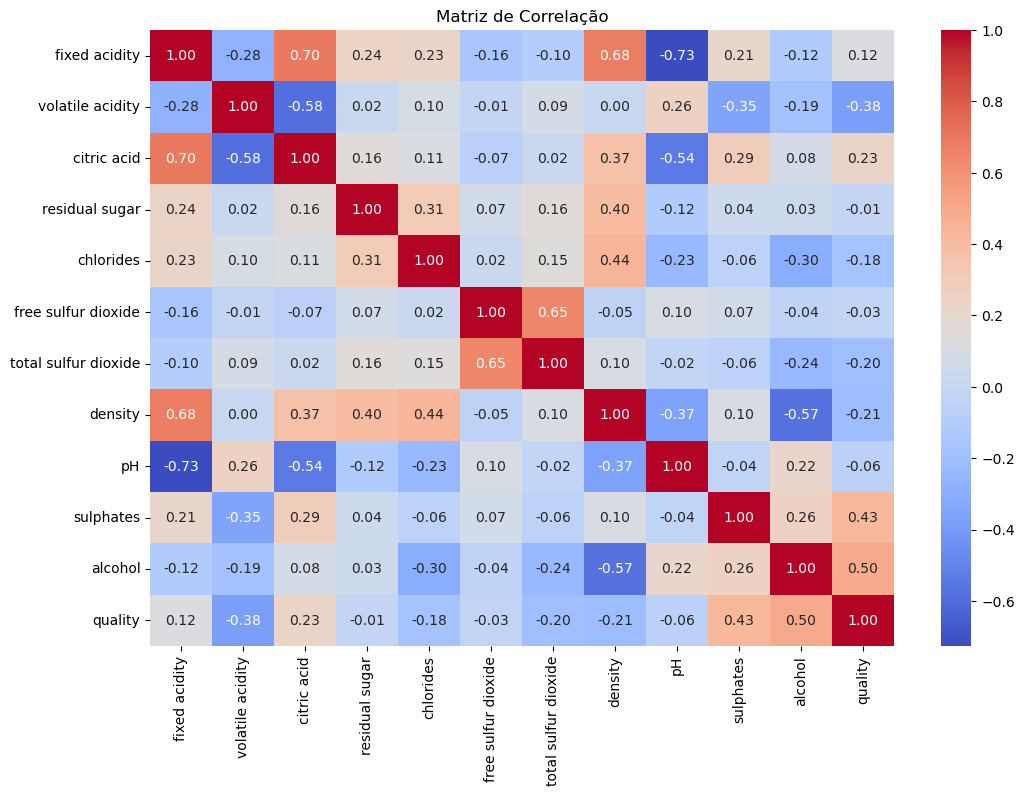

In [666]:
correlation_matrix = df_no_outliers.corr()

# Plotar a matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

Podemos identificar três variáveis com mais força de correlação para a variável `quality`, sendo elas:
- alcohol (correlação positiva)
- sulphates (correlação positiva)
- volatile acidity (correlação negativa)

Para variáveis com *correlação positiva*, significa que a variável `quality` aumenta conforme estas variáveis também aumentam.  
Para variáveis com *correlação negativa*, significa que a variável `quality` aumenta conforme estas variáveis diminuem.

## Separando as principais variáveis mais fortes

In [667]:
df_corr = df[['alcohol', 'sulphates', 'volatile acidity', 'quality']]
df_corr

,alcohol,sulphates,volatile acidity,quality
0,9.4,0.56,0.700,5
1,9.8,0.68,0.880,5
2,9.8,0.65,0.760,5
3,9.8,0.58,0.280,6
5,9.4,0.56,0.660,5
...,...,...,...,...
1593,9.5,0.82,0.620,6
1594,10.5,0.58,0.600,5
1595,11.2,0.76,0.550,6
1597,10.2,0.71,0.645,5


# 3 - Preparação Final dos Dados

A) Separe a base em X(Features) e Y(Target)

B) Separe a base em treino e teste.


### Separando bases X e Y (entrada e target)

In [668]:
# Separando a base X (variáveis de entrada) e Y (variável target)
X = df_no_outliers.drop('quality', axis=1) # Base de treino
y = df_no_outliers['quality'] # Base de testes

In [669]:
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE(random_state=42, k_neighbors=2)
X_train_sm, Y_train_sm = smote.fit_resample(X_train, y_train)

In [670]:
Y_train_sm.value_counts()

quality
5    394
6    394
4    394
8    394
7    394
3    394
Name: count, dtype: int64

# 4 - Modelagem

A) Inicie e treine o modelo de Random Forest

B) Aplique a base de teste o modelo.


In [671]:
# Iniciando o modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)

In [672]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [673]:
y_pred = rf_model.predict(X_test)

In [674]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Acurácia: {accuracy:.2f}")
print('Relatório de Classificação:\n', report)
print('Matriz de Confusão: \n', conf_matrix)

Acurácia: 0.64
Relatório de Classificação:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         8
           5       0.69      0.74      0.72        98
           6       0.61      0.68      0.64        95
           7       0.60      0.43      0.50        28
           8       0.00      0.00      0.00         3

    accuracy                           0.64       233
   macro avg       0.32      0.31      0.31       233
weighted avg       0.61      0.64      0.62       233

Matriz de Confusão: 
 [[ 0  0  1  0  0  0]
 [ 0  0  5  3  0  0]
 [ 0  0 73 25  0  0]
 [ 0  0 25 65  5  0]
 [ 0  0  2 14 12  0]
 [ 0  0  0  0  3  0]]


c:\Users\flavianojr1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\flavianojr1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\flavianojr1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# 5 - Avaliação

A) Avalie as principais métricas da Claissificação e traga insights acerca do resultado, interprete os valores achados.

B) Você nota que o modelo teve dificuldade para prever alguma classe? Se sim, acredita que tenha relação com o balanceamento dos dados? Explique.


In [675]:
#seu código aqui

# 5 - Melhorando os Hyperparametros

A) Defina o Grid de parametros que você quer testar

B) Inicie e Treine um novo modelo utilizando o random search.

C) Avalie os resultados do modelo.

D) Você identificou melhorias no modelo após aplicar o random search? Justifique.


ps. Essa parte da atividade demorará um pouco para rodar!

In [676]:
#seu código aqui

# 6 - Chegando a perfeição

Baseado em tudo que você já aprendeu até agora, quais outras técnicas você acredita que poderiam ser aplicadas ao modelo para melhorar ainda mais suas previsões?